In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## We will use logistic regression on census data to predict if an individual makes more than 50k per year.

In [122]:
df = pd.read_csv("census.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [123]:
df=df.drop(df.columns[[1,2,3,6,7,8,10,11,13]], axis=1)
df.columns = ["age","education", "race", "sex","hrs_per_wk", "income"]
df

,age,education,race,sex,hrs_per_wk,income
0,39,13,Never-married,Male,40,<=50K
1,50,13,Married-civ-spouse,Male,13,<=50K
2,38,9,Divorced,Male,40,<=50K
3,53,7,Married-civ-spouse,Male,40,<=50K
4,28,13,Married-civ-spouse,Female,40,<=50K
...,...,...,...,...,...,...
32556,27,12,Married-civ-spouse,Female,38,<=50K
32557,40,9,Married-civ-spouse,Male,40,>50K
32558,58,9,Widowed,Female,40,<=50K
32559,22,9,Never-married,Male,20,<=50K


In [124]:
mapping = {' Male': 0, ' Female': 1, " <=50K" : 0, " >50K":1}
df = df.replace({'sex': mapping, 'income': mapping})
df

,age,education,race,sex,hrs_per_wk,income
0,39,13,Never-married,0,40,0
1,50,13,Married-civ-spouse,0,13,0
2,38,9,Divorced,0,40,0
3,53,7,Married-civ-spouse,0,40,0
4,28,13,Married-civ-spouse,1,40,0
...,...,...,...,...,...,...
32556,27,12,Married-civ-spouse,1,38,0
32557,40,9,Married-civ-spouse,0,40,1
32558,58,9,Widowed,1,40,0
32559,22,9,Never-married,0,20,0


In [125]:
# this will "vectorize" categories, we drop first because if we know all but one, we know
# the last, hence there will be a correlation
df = pd.get_dummies(data=df, drop_first=True)

In [126]:
incomes = df.pop("income")
attributes = df
X_train, X_test, y_train, y_test = train_test_split(attributes,incomes)

In [127]:
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [128]:
logreg.score(X_train,y_train)

0.8216216216216217

In [129]:
logreg.score(X_test,y_test)

0.8178356467264464

In [131]:
from sklearn.metrics import f1_score
f1_score(y_test, logreg.predict(X_test))

0.5717585908172106

In [139]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, logreg.predict(X_test))

array([[5668,  466],
       [1017,  990]], dtype=int64)

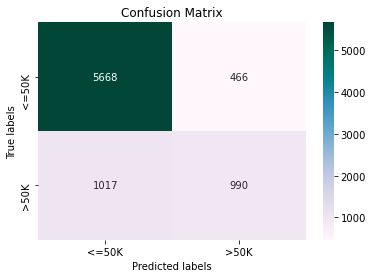

In [161]:
ax = plt.subplot()
cm = confusion_matrix(y_test, logreg.predict(X_test))
sns.heatmap(cm, annot=True, ax = ax,fmt='g',cmap='PuBuGn'); 
ax.set_xlabel("Predicted labels");ax.set_ylabel("True labels"); 
ax.set_title("Confusion Matrix"); 
ax.xaxis.set_ticklabels(["<=50K", ">50K"]); ax.yaxis.set_ticklabels(["<=50K", ">50K"]);

In [207]:
# check labels are correct
print(y_test.value_counts())
print(pd.DataFrame(logreg.predict(X_test)).value_counts())

0    6134
1    2007
Name: income, dtype: int64
0    6685
1    1456
dtype: int64
